In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Image, HTML
import numba

%pylab inline
pylab.rcParams['figure.figsize'] = (18, 5)
pd.set_option('display.max_rows', 4)

Populating the interactive namespace from numpy and matplotlib


In [2]:
charges = pd.read_csv('./inputs/Задание_3/Charges.csv', parse_dates=['BILL_MONTH'])
charges.columns.name = 'charges'
charges.drop_duplicates(inplace=True)
display(charges)
print('unique subscribers #:', len(charges['SUBSCRIBER_ID'].unique()))
print('period:', charges['BILL_MONTH'].min(), '..', charges['BILL_MONTH'].max())

charges,SUBSCRIBER_ID,BILL_MONTH,CHARGES
0,4741,2017-03-01,4.572
1,1754,2017-05-01,4.894
...,...,...,...
112593,4747,2017-06-01,5.182
112594,4992,2017-09-01,6.424


unique subscribers #: 5989
period: 2016-06-01 00:00:00 .. 2017-12-01 00:00:00


In [3]:
dttm_parser = lambda x: pd.NaT if x == '$null$' else pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

plan_changes = pd.read_csv('./inputs/Задание_3/Tariff_plans_change.csv',
                           parse_dates=['START_DTTM', 'END_DTTM'], date_parser=dttm_parser)
plan_changes.columns.name = 'plan_changes'
plan_changes.drop_duplicates(inplace=True)
display(plan_changes)

print('unique plans:', plan_changes['TARIFF_PLAN_ID'].unique())
print('unique subscribers #:', len(plan_changes['SUBSCRIBER_ID'].unique()))
print('active subscribers #:', pd.isnull(plan_changes['END_DTTM']).sum())
print('period:', plan_changes['START_DTTM'].min(), '..', plan_changes['END_DTTM'].max())

plan_changes,SUBSCRIBER_ID,TARIFF_PLAN_ID,START_DTTM,END_DTTM
0,1,2,2013-11-22 21:10:08,2017-03-11 14:24:17
1,1,3,2017-03-11 14:24:18,NaT
...,...,...,...,...
12342,5989,5,2017-05-24 14:46:11,2017-05-25 20:12:32
12343,5989,1,2017-05-25 20:12:33,NaT


unique plans: [2 3 1 5 4]
unique subscribers #: 5989
active subscribers #: 5923
period: 1999-07-12 12:55:54 .. 2018-01-19 17:51:56


In [4]:
dt_parser = lambda x: pd.NaT if x == '$null$' else pd.datetime.strptime(x, '%Y-%m-%d')

suspensions = pd.read_csv('./inputs/Задание_3/Suspended.csv', 
                          parse_dates=['START_DT', 'END_DT'], date_parser=dt_parser)
suspensions.columns.name = 'suspensions'
suspensions.drop_duplicates(inplace=True)
suspensions['duration'] = suspensions['END_DT'] - suspensions['START_DT']
display(suspensions)
print('unique subscribers #:', len(suspensions['SUBSCRIBER_ID'].unique()))
print('suspended subscribers #:', pd.isnull(suspensions['END_DT']).sum())
print('period:', suspensions['START_DT'].min(), '..', suspensions['END_DT'].max())

suspensions,SUBSCRIBER_ID,START_DT,END_DT,STATUS,duration
0,5195,2017-12-27,2017-12-27,Suspended,0 days
1,5198,2017-04-18,2017-04-18,Suspended,0 days
...,...,...,...,...,...
4061,2166,2016-06-11,2016-06-11,Suspended,0 days
4062,2166,2016-06-05,2016-06-05,Suspended,0 days


unique subscribers #: 1310
suspended subscribers #: 66
period: 2016-06-01 00:00:00 .. 2018-01-17 00:00:00


In [5]:
charges_pivoted = charges.pivot(columns='BILL_MONTH', values='CHARGES', index='SUBSCRIBER_ID')
display(charges_pivoted)

BILL_MONTH,2016-06-01 00:00:00,2016-07-01 00:00:00,2016-08-01 00:00:00,2016-09-01 00:00:00,2016-10-01 00:00:00,2016-11-01 00:00:00,2016-12-01 00:00:00,2017-01-01 00:00:00,2017-02-01 00:00:00,2017-03-01 00:00:00,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00
SUBSCRIBER_ID,,,,,,,,,,,,,,,,,,,
1,21.137,32.545,30.042,24.964,27.628,22.374,21.132,20.268,27.858,27.660,23.983,27.487,23.651,28.552,32.074,24.012,20.464,19.296,16.062
2,4.756,5.868,5.876,4.853,5.237,6.946,5.750,5.327,5.092,5.467,5.440,5.868,5.675,5.044,5.368,4.984,5.292,4.964,4.964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.667,11.506,8.632,8.516,4.884,6.589,0.000,0.000
5989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.294,5.068,5.016,5.122,6.068,5.752,5.088,5.226


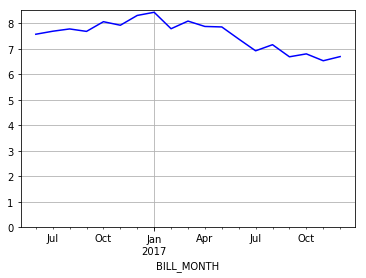

In [6]:
mean_charges_per_month = charges_pivoted.mean(axis=0)
mean_charges_per_month.plot(ylim=(0, None), color='blue', grid=True)

In [7]:
charges_per_subscriber = charges_pivoted.sum(axis=1)
display(charges_per_subscriber)

SUBSCRIBER_ID
1       471.189
2       102.771
         ...   
5988     59.794
5989     38.634
Length: 5989, dtype: float64

In [8]:
plans = plan_changes.copy()
plans['duration'] = plans['END_DTTM'] - plans['START_DTTM']

@numba.jit
def find_prev_plans(plan_changes):
    "assumes that plan_changes is sorted by ['SUBSCRIBER_ID', 'START_DTTM']"
    p = plan_changes
    p['prev_plan'] = pd.Series(index=p.index, dtype=p['TARIFF_PLAN_ID'].dtype)
    p['prev_duration'] = pd.Series(pd.NaT, index=p.index, dtype=p['duration'].dtype)
    p['no_plan_duration'] = pd.Series(pd.NaT, index=p.index, dtype=p['duration'].dtype)
    
    prev_subs = None
    prev_plan = -1
    prev_dur = pd.NaT
    prev_end = pd.NaT
    for i in p.index:
        row = p.loc[i]
        subs, plan, dur, start, end = row[['SUBSCRIBER_ID', 'TARIFF_PLAN_ID', 'duration', 'START_DTTM', 'END_DTTM']]
        if subs != prev_subs: 
            prev_subs = subs
            prev_plan = -1
            prev_dur = pd.NaT
            prev_end = pd.NaT
        p.at[i, 'prev_plan'] = prev_plan
        p.at[i, 'prev_duration'] = prev_dur
        p.at[i, 'no_plan_duration'] = start - prev_end
        prev_plan = plan
        prev_dur = dur
        prev_end = end

plans.sort_values(by=['SUBSCRIBER_ID', 'START_DTTM'], inplace=True)
find_prev_plans(plans)
with pd.option_context('display.max_rows', 10):
    display(plans.iloc[:])
    print(plans['no_plan_duration'].describe())

plan_changes,SUBSCRIBER_ID,TARIFF_PLAN_ID,START_DTTM,END_DTTM,duration,prev_plan,prev_duration,no_plan_duration
0,1,2,2013-11-22 21:10:08,2017-03-11 14:24:17,1204 days 17:14:09,-1,NaT,NaT
1,1,3,2017-03-11 14:24:18,NaT,NaT,2,1204 days 17:14:09,00:00:01
2,2,1,2016-02-05 16:36:34,2017-06-29 12:39:58,509 days 20:03:24,-1,NaT,NaT
3,2,5,2017-06-29 12:39:59,NaT,NaT,1,509 days 20:03:24,00:00:01
4,3,1,2015-05-06 19:17:46,2017-04-14 12:00:59,708 days 16:43:13,-1,NaT,NaT
...,...,...,...,...,...,...,...,...
12339,5987,3,2017-05-23 13:07:57,NaT,NaT,5,14 days 19:40:35,00:00:01
12340,5988,1,2017-05-10 10:36:53,2017-05-22 16:36:55,12 days 06:00:02,-1,NaT,NaT
12341,5988,4,2017-05-22 16:36:56,NaT,NaT,1,12 days 06:00:02,00:00:01
12342,5989,5,2017-05-24 14:46:11,2017-05-25 20:12:32,1 days 05:26:21,-1,NaT,NaT


count                      6298
mean     0 days 02:18:18.355986
std      2 days 18:30:43.797872
min             0 days 00:00:01
25%             0 days 00:00:01
50%             0 days 00:00:01
75%             0 days 00:00:01
max           135 days 19:48:11
Name: no_plan_duration, dtype: object


In [9]:
no_plan_long_duration = pd.Timedelta(7, 'D')
long_plans = plans['no_plan_duration'] > no_plan_long_duration
plans_to_drop = plans[long_plans]
same_plans = plans[plans['TARIFF_PLAN_ID'] == plans['prev_plan']]
plans_to_drop.columns.name = 'plans_to_drop'
ps = plans.drop(index=plans_to_drop.index)

with pd.option_context('display.max_rows', 10):
    print('dropped plans #:', len(plans_to_drop))
    print('plans after dropping #:', len(ps))
    print('same plans #:', len(same_plans))
    display(plans_to_drop)

dropped plans #: 10
plans after dropping #: 12277
same plans #: 10


plans_to_drop,SUBSCRIBER_ID,TARIFF_PLAN_ID,START_DTTM,END_DTTM,duration,prev_plan,prev_duration,no_plan_duration
387,187,4,2017-05-23 21:18:55,2017-06-09 13:38:02,16 days 16:19:07,5,38 days 06:33:22,103 days 02:24:03
983,475,3,2017-06-01 10:27:43,NaT,NaT,5,11 days 05:47:20,135 days 19:48:11
2486,1209,5,2017-04-01 12:02:41,NaT,NaT,5,29 days 21:34:33,30 days 23:38:40
5536,2690,5,2017-04-30 23:28:51,NaT,NaT,5,90 days 04:53:47,17 days 04:25:05
7243,3527,5,2017-06-24 20:27:54,2018-01-15 17:30:33,204 days 21:02:39,5,26 days 08:18:21,104 days 01:30:37
9077,4420,5,2017-04-01 15:27:13,NaT,NaT,5,7 days 15:34:46,29 days 00:35:11
9466,4608,1,2017-05-11 16:09:07,2017-06-02 17:07:39,22 days 00:58:32,3,382 days 21:59:25,55 days 07:36:31
9591,4669,3,2017-04-14 17:00:26,NaT,NaT,5,17 days 08:02:42,26 days 20:39:31
11576,5630,3,2017-04-01 21:49:58,NaT,NaT,3,19 days 18:40:34,45 days 07:12:51
12204,5929,5,2017-02-18 19:26:05,2017-03-17 10:38:22,26 days 15:12:17,1,31 days 22:13:15,21 days 04:13:53


In [10]:
def dur_aggfunc(series):
    return np.sum(series) #if series.count() else pd.NaT

plans_pivoted = plans.pivot_table(columns='TARIFF_PLAN_ID', index='SUBSCRIBER_ID', values='duration',
                                  aggfunc=dur_aggfunc)
with pd.option_context('display.max_rows', 10):
    display(plans_pivoted)

TARIFF_PLAN_ID,1,2,3,4,5
SUBSCRIBER_ID,,,,,
1,NaT,1204 days 17:14:09,0 days 00:00:00,NaT,NaT
2,509 days 20:03:24,NaT,NaT,NaT,0 days 00:00:00
3,708 days 16:43:13,NaT,NaT,NaT,0 days 00:00:00
4,NaT,NaT,347 days 20:23:59,NaT,0 days 00:00:00
5,457 days 04:32:44,NaT,NaT,NaT,0 days 00:00:00
...,...,...,...,...,...
5985,NaT,NaT,NaT,64 days 00:59:13,0 days 00:00:00
5986,0 days 00:00:00,NaT,NaT,NaT,57 days 06:16:30
5987,NaT,NaT,0 days 00:00:00,NaT,14 days 19:40:35


In [25]:
migrations = ps.pivot_table(index='prev_plan', columns='TARIFF_PLAN_ID', values='duration', aggfunc=len)

with pd.option_context('display.max_rows', 10):
    print('total migrations #', len(ps))
    display(migrations)
print(migrations.to_json())
migrations.to_json('outputs/migrations.json')

total migrations # 12277


TARIFF_PLAN_ID,1,2,3,4,5
prev_plan,,,,,
-1,2021.0,604.0,2745.0,528.0,91.0
1,NaN,5.0,55.0,378.0,1612.0
2,13.0,NaN,20.0,158.0,417.0
3,27.0,12.0,1.0,367.0,2372.0
4,37.0,20.0,56.0,1.0,528.0
5,81.0,4.0,73.0,48.0,3.0


{"1":{"-1":2021.0,"1":null,"2":13.0,"3":27.0,"4":37.0,"5":81.0},"2":{"-1":604.0,"1":5.0,"2":null,"3":12.0,"4":20.0,"5":4.0},"3":{"-1":2745.0,"1":55.0,"2":20.0,"3":1.0,"4":56.0,"5":73.0},"4":{"-1":528.0,"1":378.0,"2":158.0,"3":367.0,"4":1.0,"5":48.0},"5":{"-1":91.0,"1":1612.0,"2":417.0,"3":2372.0,"4":528.0,"5":3.0}}


In [27]:
HTML(filename='migrations-flow/dist/index.html')
# Image(filename='migrations-all-time.png')